<a href="https://colab.research.google.com/github/AndreiTsvirko/DataScience/blob/main/HW_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка данных

In [11]:
import pandas as pd
#Загрузка данных из csv
def load_car_data():
    try:
        df = pd.read_csv('data.csv')
        print(" Данные успешно загружены!")
        print(f"Размер данных: {df.shape}")
        print(f"Столбцы: {list(df.columns)}")
        return df
    except Exception as e:
        print(f" Ошибка загрузки: {e}")
        return None

#Класс для работы с пропущенными данными

In [8]:
import pandas as pd
#Работа с пропущенными значениями
class MissingValuesHandler:

    def __init__(self, df):
        self.df = df
        self.missing_counts = None
  #Считаем пропущенные значения
    def count_missing(self):
        print(" Подсчет пропущенных значений.")
        self.missing_counts = self.df.isnull().sum()
        return self.missing_counts
  #Формирование отчета
    def show_report(self):
        if self.missing_counts is None:
            self.count_missing()

        print("\n Отчет о пропущенных значениях")
        print("*" * 40)

        total_missing = self.missing_counts.sum()
        print(f"Всего пропущено: {total_missing}")
        print("-" * 40)

        has_missing = False
        for col, count in self.missing_counts.items():
            if count > 0:
                print(f"{col}: {count} пропусков")
                has_missing = True

        if not has_missing:
            print(" Пропущенных нет.")
  #Заполняем пропущенные значения самым частым значением
    def fill_with_most_common(self):
        print("\n Заполняем пропуски.")

        df_filled = self.df.copy()
        filled_count = 0

        for col in df_filled.columns:
            missing_count = df_filled[col].isnull().sum()

            if missing_count > 0:
                # Для чисел используем медиану
                if df_filled[col].dtype in ['int64', 'float64']:
                    fill_value = df_filled[col].median()
                else:
                    # Для текста используем моду
                    mode_val = df_filled[col].mode()
                    fill_value = mode_val.iloc[0] if not mode_val.empty else 'Неизвестно'

                df_filled[col].fillna(fill_value, inplace=True)
                print(f"{col}: заполнено {missing_count} пропусков")
                filled_count += missing_count

        if filled_count == 0:
            print(" Пропущенных для заполнения не найдено")
        else:
            print(f" Всего заполнено {filled_count} пропущенных")

        return df_filled

#Проверка данных

In [3]:
import pandas as pd
from missing_values import MissingValuesHandler
#Проверка данных
def check_data(df):
    print(" Проверка данных:")
    print(f"Размер: {df.shape[0]} строк, {df.shape[1]} столбцов")

    # Используем класс для проверки пропусков
    handler = MissingValuesHandler(df)
    handler.show_report()

    # Проверяем дубликаты
    duplicates = df.duplicated().sum()
    print(f"Дубликаты: {duplicates}")

    return df
#Очистка данных
def clean_data(df):
    print("\n Очистка данных:")

    # 1. Удаляем дубликаты
    old_size = len(df)
    df_clean = df.drop_duplicates()
    new_size = len(df_clean)
    print(f"Удалили дубликатов: {old_size - new_size}")

    # 2. Заполняем пропуски с помощью класса
    handler = MissingValuesHandler(df_clean)
    df_clean = handler.fill_with_most_common()

    print(f"Новый размер: {df_clean.shape}")
    return df_clean
#Описание данных
def show_info(df):
    print("\n Инфориация о данных:")

    if 'Make' in df.columns:
        print(f"Марок машин: {df['Make'].nunique()}")

    if 'Year' in df.columns:
        print(f"Годы: от {df['Year'].min()} до {df['Year'].max()}")

    if 'MSRP' in df.columns:
        print(f"Цены: от ${df['MSRP'].min():,} до ${df['MSRP'].max():,}")

#Визуализация данных

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
#Визуализация данных
class CarVisualizer:

    def __init__(self, df):
        self.df = df
        self.created_plots = []
  #Гистограмма цен
    def plot_prices(self):
        if 'MSRP' in self.df.columns:
            plt.figure(figsize=(10, 5))
            plt.hist(self.df['MSRP'], bins=20, color='skyblue', edgecolor='black')
            plt.title('Распределение цен автомобилей')
            plt.xlabel('Цена ($)')
            plt.ylabel('Количество')
            plt.grid(alpha=0.3)
            plt.show()
            self.created_plots.append('Гистограмма цен')
            print(" Создана гистограмма цен")
    #Топ марок
    def plot_top_brands(self, n=10):
        if 'Make' in self.df.columns:
            top_brands = self.df['Make'].value_counts().head(n)

            plt.figure(figsize=(12, 6))
            top_brands.plot(kind='bar', color='lightgreen')
            plt.title(f'Топ {n} марок автомобилей')
            plt.xlabel('Марка')
            plt.ylabel('Количество')
            plt.xticks(rotation=45)
            plt.grid(alpha=0.3)
            plt.show()

            self.created_plots.append('Топ марок')
            print(" Создан график топ марок")
  #График цена от года
    def plot_year_price(self):
        if 'Year' in self.df.columns and 'MSRP' in self.df.columns:
            plt.figure(figsize=(10, 6))
            plt.scatter(self.df['Year'], self.df['MSRP'], alpha=0.5, color='orange')
            plt.title('Зависимость цены от года выпуска')
            plt.xlabel('Год выпуска')
            plt.ylabel('Цена ($)')
            plt.grid(alpha=0.3)
            plt.show()

            self.created_plots.append('Цена vs Год')
            print(" Создан график цена от год")
  #Список сформированных графиков
    def show_plots_list(self):
        if self.created_plots:
            print("\n Созданные графики:")
            for i, plot in enumerate(self.created_plots, 1):
                print(f"{i}. {plot}")
        else:
            print(" Графики еще не созданы")

#Исполняемый модуль

 АНАЛИЗ ДАННЫХ АВТОМОБИЛЕЙ
****************************************

1. ЗАГРУЗКА ДАННЫХ.
✅ Данные успешно загружены!
Размер данных: (11914, 16)
Столбцы: ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

2. ПРОВЕРКА ДАННЫХ.
🔍 ПРОВЕРКА ДАННЫХ:
Размер: 11914 строк, 16 столбцов
🔍 Подсчет пропущенных значений...

📊 ОТЧЕТ О ПРОПУЩЕННЫХ ЗНАЧЕНИЯХ
Всего пропусков: 3850
----------------------------------------
Engine Fuel Type: 3 пропусков
Engine HP: 69 пропусков
Engine Cylinders: 30 пропусков
Number of Doors: 6 пропусков
Market Category: 3742 пропусков
Дубликаты: 715

3. ОЧИСТКА ДАННЫХ.

🧹 ОЧИСТКА ДАННЫХ:
Удалили дубликатов: 715

🔄 Заполняем пропуски...
Engine Fuel Type: заполнено 3 пропусков
Engine HP: заполнено 69 пропусков
Engine Cylinders: заполнено 30 пропусков
Number of Doors: заполнено 6 пропусков
Mark

/content/missing_values.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(fill_value, inplace=True)


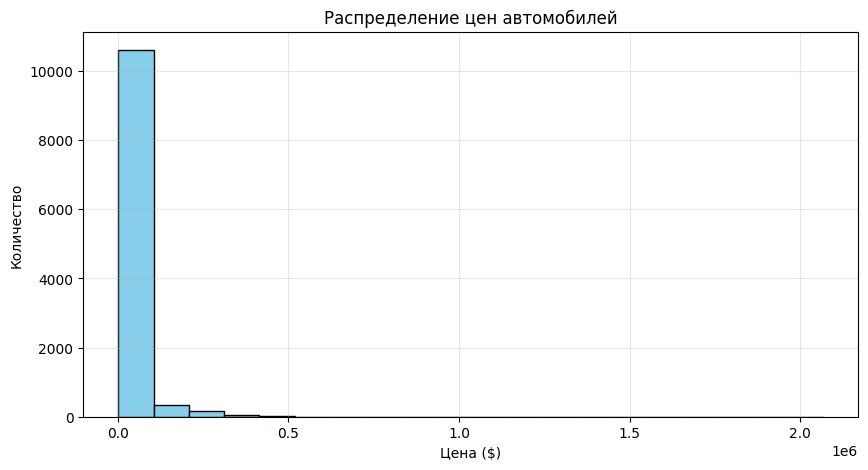

✅ Создана гистограмма цен


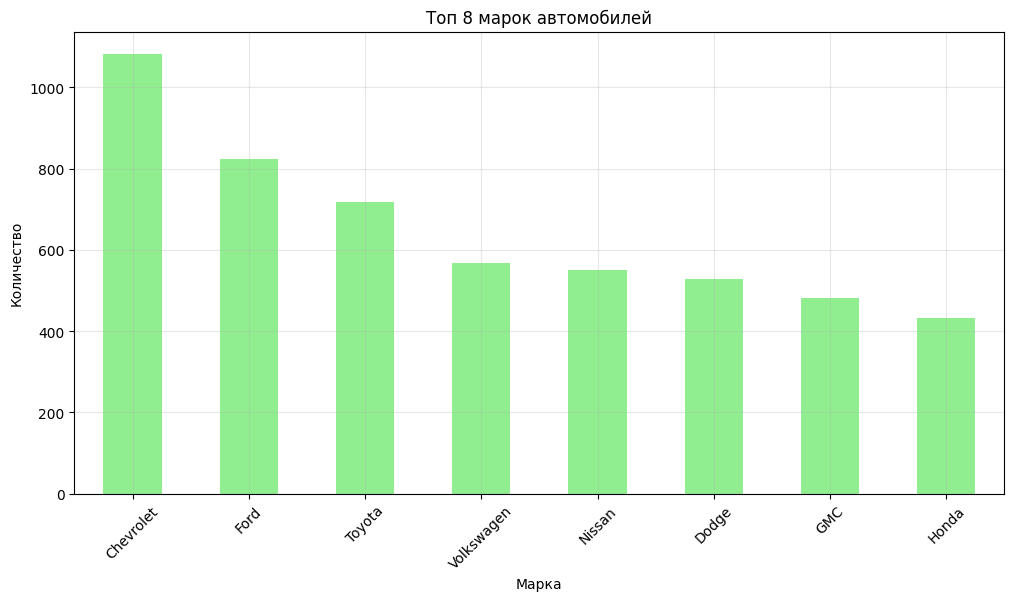

✅ Создан график топ марок


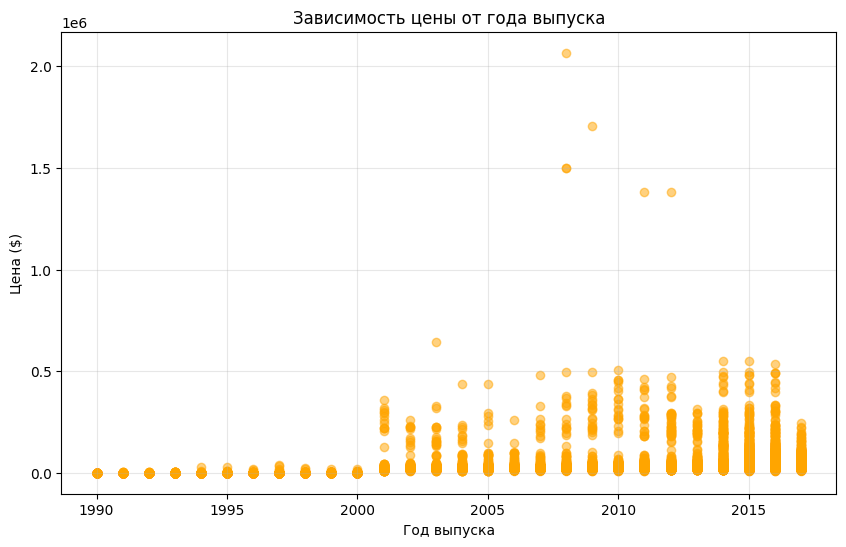

✅ Создан график цена vs год

📈 СОЗДАННЫЕ ГРАФИКИ:
1. Гистограмма цен
2. Топ марок
3. Цена vs Год

 Кажется выполнено.


In [10]:
from data_loader import load_car_data
from data_processing import check_data, clean_data, show_info
from data_visualizer import CarVisualizer

def main():
    print(" АНАЛИЗ ДАННЫХ АВТОМОБИЛЕЙ")
    print("*" * 40)

    # 1. Загрузка данных
    print("\n1. ЗАГРУЗКА ДАННЫХ.")
    df = load_car_data()

    if df is None:
        return

    # 2. Проверка данных
    print("\n2. ПРОВЕРКА ДАННЫХ.")
    check_data(df)

    # 3. Очистка данных
    print("\n3. ОЧИСТКА ДАННЫХ.")
    df_clean = clean_data(df)

    # 4. Информация о данных
    print("\n4. ИНФОРМАЦИЯ О ДАННЫХ.")
    show_info(df_clean)

    # 5. Визуализация
    print("\n5. ВИЗУАЛИЗАЦИЯ.")
    viz = CarVisualizer(df_clean)
    viz.plot_prices()
    viz.plot_top_brands(8)
    viz.plot_year_price()
    viz.show_plots_list()

    print("\n Кажется выполнено.")

if __name__ == "__main__":
    main()